In [1]:
import sys
import os
import pickle
sys.path.append(os.path.abspath('..'))

In [2]:
from helper import *

# Device detection and setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

set_seed = 42

Using device: cuda
CUDA device: NVIDIA GeForce RTX 4060 Ti
CUDA memory: 16.0 GB


In [3]:
max_knn = 100

In [4]:
# Function: compare average closest_cross_entropy for three similarity metrics
# Usage: call compare_avg_closest_cross_entropy(cross_results_l1, cross_results_l2, cross_results_cosine, key='closest_cross_entropy', max_k=max_knn)
import numpy as np
import matplotlib.pyplot as plt

def compare_avg_closest_cross_entropy(cross_l1, cross_l2, cross_cosine, key='closest_cross_entropy', max_k=None, title=None):
    """Compute the mean across samples for the given key (default 'closest_cross_entropy')
    for three cross_results objects and plot them together. Also prints the three
    mean series side-by-side for easy text comparison.

    Supports inputs where the key maps to:
    - a list of arrays (n_samples x n_k)
    - a numpy array (n_samples x n_k or n_k)
    - the cross_results itself may be a dict containing the key
    """
    def extract_mean(x):
        # If caller passed a dict-like object, fetch the key
        if isinstance(x, dict):
            if key not in x:
                raise KeyError(f"Key '{key}' not found in provided cross_results dict")
            v = x[key]
        else:
            v = x
        arr = np.array(v)
        if arr.ndim == 1:
            return arr
        # mean across samples (axis 0 is sample axis if shape is (n_samples, n_k))
        return arr.mean(axis=0)

    m1 = extract_mean(cross_l1)
    m2 = extract_mean(cross_l2)
    m3 = extract_mean(cross_cosine)

    # Determine length and trim to max_k if requested
    n = max(len(m1), len(m2), len(m3))
    if max_k is not None:
        n = min(n, int(max_k))
    m1 = np.asarray(m1)[:n]
    m2 = np.asarray(m2)[:n]
    m3 = np.asarray(m3)[:n]

    ks = np.arange(1, n + 1)

    plt.figure(figsize=(8, 4.5))
    plt.plot(ks, m1, label='L1', marker='o', markersize=3)
    plt.plot(ks, m2, label='L2', marker='s', markersize=3)
    plt.plot(ks, m3, label='Cosine', marker='^', markersize=3)
    plt.xlabel('k (neighbors)')
    plt.ylabel(key)
    plt.title(title or f'Average {key}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print side-by-side (tab-separated) with 4-decimals
    from itertools import zip_longest
    def fmt(a):
        return [f"{float(x):.4f}" for x in a]

    rows = zip_longest(fmt(m1), fmt(m2), fmt(m3), fillvalue='')
    print('\t'.join(['L1', 'L2', 'Cosine']))
    for r in rows:
        print('\t'.join(r))

    return {'ks': ks, 'l1': m1, 'l2': m2, 'cosine': m3}


## Retrain

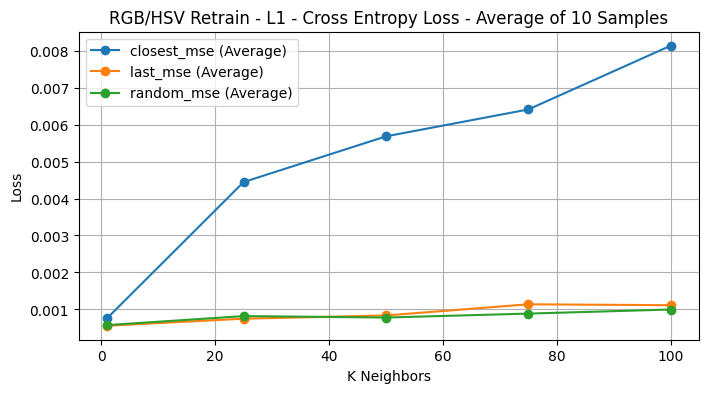

In [5]:
with open('retrain_data/l1/50_epochs_15_indices.pkl', 'rb') as f:
    random_indices_l1 = pickle.load(f)

with open('retrain_data/l1/50_epochs_15_data.pkl', 'rb') as f:
    cross_results_l1 = pickle.load(f)

with open('retrain_data/l1/knn_distances_50_epochs_15.pkl', 'rb') as f:
    knn_distances_l1 = pickle.load(f)

visualize_results(cross_results_l1, random_indices_l1, average=True, normalize=False, title=f"RGB/HSV Retrain - L1 - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_l1, subset='closest',k=100, title="KNN Distance Statistics - L1 Similarity")

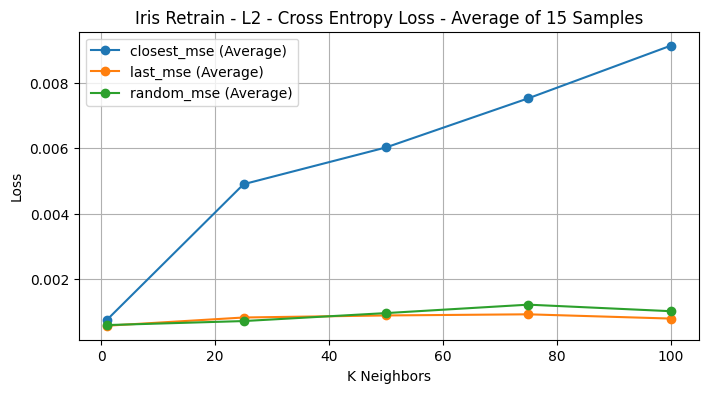

In [6]:
with open('retrain_data/l2/50_epochs_15_indices.pkl', 'rb') as f:
    random_indices_l2 = pickle.load(f)

with open('retrain_data/l2/50_epochs_15_data.pkl', 'rb') as f:
    cross_results_l2 = pickle.load(f)

with open('retrain_data/l2/knn_distances_50_epochs_15.pkl', 'rb') as f:
    knn_distances_l2 = pickle.load(f)

visualize_results(cross_results_l2, random_indices_l2, average=True, normalize=False, title=f"Iris Retrain - L2 - Cross Entropy Loss - Average of {len(random_indices_l2)} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_l2, subset='closest',k=100, title="KNN Distance Statistics - L2 Similarity")

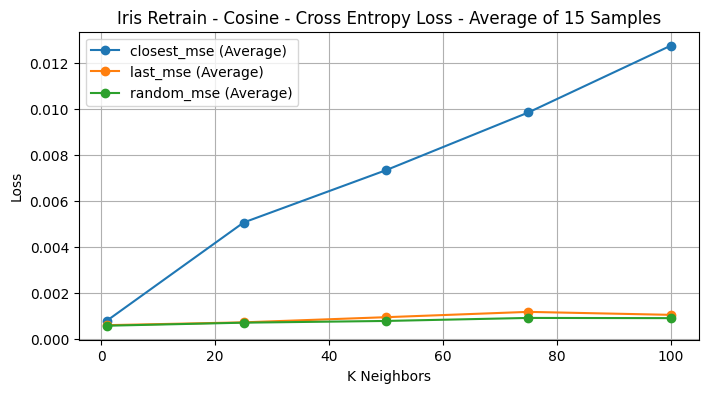

In [7]:
with open('retrain_data/cosine/50_epochs_15_indices.pkl', 'rb') as f:
    random_indices_cosine = pickle.load(f)

with open('retrain_data/cosine/50_epochs_15_data.pkl', 'rb') as f:
    cross_results_cosine = pickle.load(f)

with open('retrain_data/cosine/knn_distances_50_epochs_15.pkl', 'rb') as f:
    knn_distances_cosine = pickle.load(f)

visualize_results(cross_results_cosine, random_indices_cosine, average=True, normalize=False, title=f"Iris Retrain - Cosine - Cross Entropy Loss - Average of {len(random_indices_cosine)} Samples", max_knn=max_knn)
#plot_knn_distance_stats(knn_distances_cosine, subset='closest',k=100, title="KNN Distance Statistics - Cosine Similarity")

## Continue

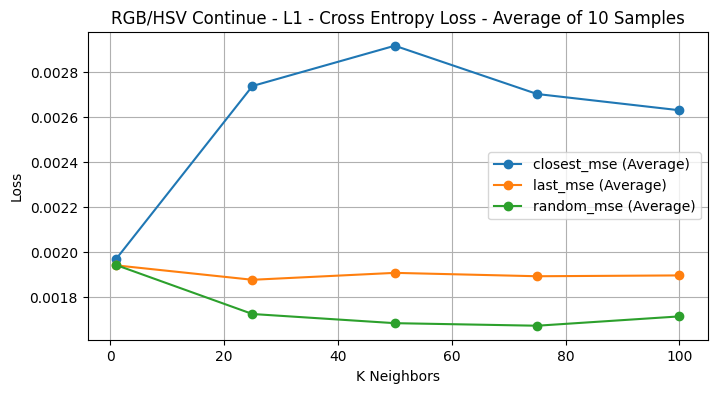

In [8]:
with open('continue_data/l1/50_epochs_15_indices.pkl', 'rb') as f:
    con_random_indices_l1 = pickle.load(f)

with open('continue_data/l1/50_epochs_15_data.pkl', 'rb') as f:
    con_cross_results_l1 = pickle.load(f)

with open('continue_data/l1/knn_distances_50_epochs_15.pkl', 'rb') as f:
    con_knn_distances_l1 = pickle.load(f)

visualize_results(con_cross_results_l1, con_random_indices_l1, average=True, normalize=False, title=f"RGB/HSV Continue - L1 - Cross Entropy Loss - Average of {10} Samples", max_knn=max_knn)
#plot_knn_distance_stats(con_knn_distances_l1, subset='closest',k=100, title="KNN Distance Statistics - L1 Similarity")

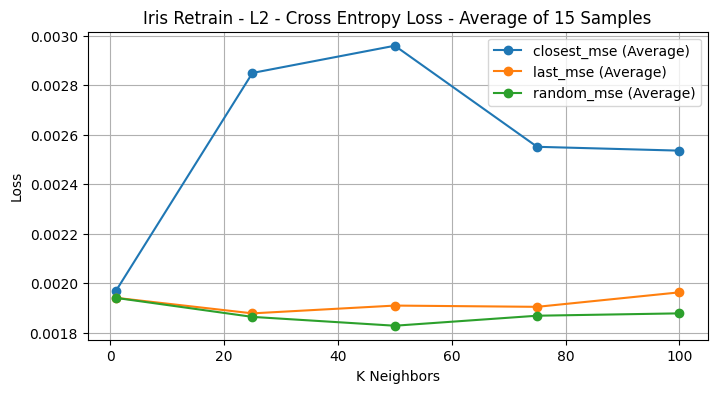

In [9]:
with open('continue_data/l2/50_epochs_15_indices.pkl', 'rb') as f:
    con_random_indices_l2 = pickle.load(f)

with open('continue_data/l2/50_epochs_15_data.pkl', 'rb') as f:
    con_cross_results_l2 = pickle.load(f)

with open('continue_data/l2/knn_distances_50_epochs_15.pkl', 'rb') as f:
    con_knn_distances_l2 = pickle.load(f)

visualize_results(con_cross_results_l2, con_random_indices_l2, average=True, normalize=False, title=f"Iris Retrain - L2 - Cross Entropy Loss - Average of {len(con_random_indices_l2)} Samples", max_knn=max_knn)
#plot_knn_distance_stats(con_knn_distances_l2, subset='closest',k=100, title="KNN Distance Statistics - L2 Similarity")

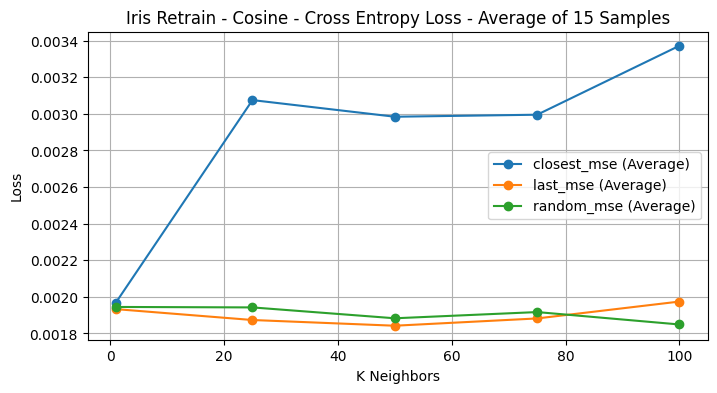

In [10]:
with open('continue_data/cosine/50_epochs_15_indices.pkl', 'rb') as f:
    con_random_indices_cosine = pickle.load(f)

with open('continue_data/cosine/50_epochs_15_data.pkl', 'rb') as f:
    con_cross_results_cosine = pickle.load(f)

with open('continue_data/cosine/knn_distances_50_epochs_15.pkl', 'rb') as f:
    con_knn_distances_cosine = pickle.load(f)

visualize_results(con_cross_results_cosine, con_random_indices_cosine, average=True, normalize=False, title=f"Iris Retrain - Cosine - Cross Entropy Loss - Average of {len(con_random_indices_cosine)} Samples", max_knn=max_knn)
#plot_knn_distance_stats(con_knn_distances_cosine, subset='closest',k=100, title="KNN Distance Statistics - Cosine Similarity")

{1: 0.00196801571873948, 25: 0.0027373234363039954, 50: 0.0029160813137423247, 75: 0.0027017407284195844, 100: 0.002629704501790305}
{1: 0.00196801571873948, 25: 0.0028496354643721133, 50: 0.0029596452538195686, 75: 0.0025510539504466577, 100: 0.002535547289880924}
{1: 0.00196801571873948, 25: 0.0030749966206106666, 50: 0.0029841320118672836, 75: 0.0029951326054288075, 100: 0.003372198646926942}


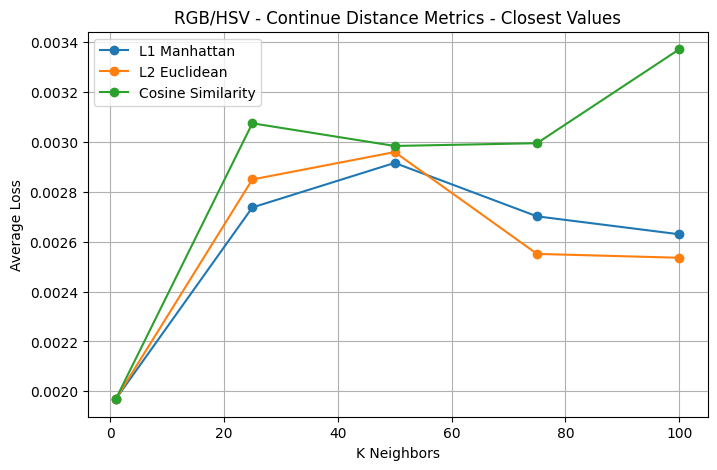

In [11]:
continue_averages_l1 = {k: sum(v) / len(v) for k, v in con_cross_results_l1['closest_mse'].items()}
continue_averages_l2 = {k: sum(v) / len(v) for k, v in con_cross_results_l2['closest_mse'].items()}
continue_averages_cosine = {k: sum(v) / len(v) for k, v in con_cross_results_cosine['closest_mse'].items()}

print(continue_averages_l1)
print(continue_averages_l2)
print(continue_averages_cosine)

datasets = [
    ("L1 Manhattan", continue_averages_l1),
    ("L2 Euclidean", continue_averages_l2),
    ("Cosine Similarity", continue_averages_cosine)
]

plt.figure(figsize=(8,5))

for name, d in datasets:
    # Sort by keys to ensure correct order on x-axis
    x = sorted(d.keys())
    y = [d[k] for k in x]
    plt.plot(x, y, marker="o", label=name)

plt.title("RGB/HSV - Continue Distance Metrics - Closest Values")
plt.xlabel("K Neighbors")
plt.ylabel("Average Loss")
plt.legend()
plt.grid(True)
plt.show()

{1: 0.0007560287820524536, 25: 0.0044450621110930415, 50: 0.005681851662908836, 75: 0.006409913953878761, 100: 0.008134640757149706}
{1: 0.0007548278939793817, 25: 0.004898134692242214, 50: 0.006020476610865444, 75: 0.00752145631267922, 100: 0.00912825414367641}
{1: 0.0007841908862853112, 25: 0.0050579122713922215, 50: 0.007335907279533179, 75: 0.009849657162461275, 100: 0.012757953818072565}


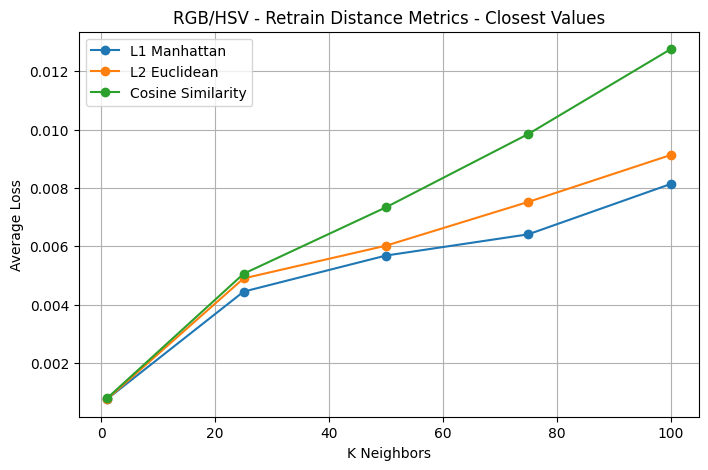

In [12]:
retrain_averages_l1 = {k: sum(v) / len(v) for k, v in cross_results_l1['closest_mse'].items()}
retrain_averages_l2 = {k: sum(v) / len(v) for k, v in cross_results_l2['closest_mse'].items()}
retrain_averages_cosine = {k: sum(v) / len(v) for k, v in cross_results_cosine['closest_mse'].items()}

print(retrain_averages_l1)
print(retrain_averages_l2)
print(retrain_averages_cosine)

datasets = [
    ("L1 Manhattan", retrain_averages_l1),
    ("L2 Euclidean", retrain_averages_l2),
    ("Cosine Similarity", retrain_averages_cosine)
]

plt.figure(figsize=(8,5))

for name, d in datasets:
    # Sort by keys to ensure correct order on x-axis
    x = sorted(d.keys())
    y = [d[k] for k in x]
    plt.plot(x, y, marker="o", label=name)

plt.title("RGB/HSV - Retrain Distance Metrics - Closest Values")
plt.xlabel("K Neighbors")
plt.ylabel("Average Loss")
plt.legend()
plt.grid(True)
plt.show()

## Comparison KNN Differences

1: min=2.59445  max=5.36542  avg=3.94631
10: min=6.37351  max=12.9517  avg=9.01255
20: min=7.41919  max=17.3835  avg=11.3892
30: min=8.07331  max=19.847  avg=13.291
40: min=9.15621  max=22.3139  avg=14.8756
50: min=10.0387  max=23.7333  avg=16.2062
60: min=10.9083  max=25.1384  avg=17.4019
70: min=11.3644  max=26.5262  avg=18.5101
80: min=12.2593  max=27.7954  avg=19.5311
90: min=12.9652  max=29.133  avg=20.444
100: min=13.468  max=30.5924  avg=21.3138


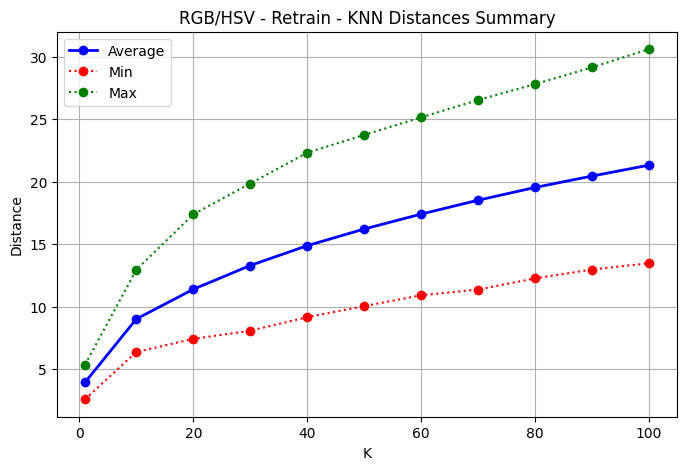

In [18]:
import statistics as stats

closest = knn_distances_l1['closest_distances']  # your dict

def flatten_one_level(x):
    if not x:
        return []
    if isinstance(x[0], (list, tuple)):
        out = []
        for sub in x:
            if isinstance(sub, (list, tuple)):
                out.extend(sub)
            else:
                out.append(sub)
        return out
    return x

summary = {}
for k, v in closest.items():
    vals = flatten_one_level(v)
    if vals:  # skip empty
        summary[k] = {
            "min": min(vals),
            "max": max(vals),
            "avg": stats.fmean(vals),  # numerically robust mean
        }

# Example: print nicely, sorted by key
for k in sorted(summary):
    s = summary[k]
    print(f"{k}: min={s['min']:.6g}  max={s['max']:.6g}  avg={s['avg']:.6g}")
    
# Sort by keys
x = sorted(summary.keys())
y_min = [summary[k]["min"] for k in x]
y_max = [summary[k]["max"] for k in x]
y_avg = [summary[k]["avg"] for k in x]

plt.figure(figsize=(8,5))

# Plot avg as solid line with dots
plt.plot(x, y_avg, label="Average", color="blue", linewidth=2, marker="o")

# Plot min and max as dotted lines with dots
plt.plot(x, y_min, label="Min", color="red", linestyle="dotted", marker="o")
plt.plot(x, y_max, label="Max", color="green", linestyle="dotted", marker="o")

plt.title("RGB/HSV - Retrain - KNN Distances Summary")
plt.xlabel("K")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

1: min=0.718206  max=5.30699  avg=2.25644
10: min=4.68908  max=12.684  avg=7.20007
20: min=6.52932  max=15.3219  avg=9.36931
30: min=7.26137  max=17.1178  avg=11.0283
40: min=8.15779  max=19.6158  avg=12.5077
50: min=8.96806  max=21.2969  avg=13.7414
60: min=9.44661  max=22.8059  avg=14.7882
70: min=10.0971  max=24.3181  avg=15.72
80: min=10.894  max=25.433  avg=16.5789
90: min=11.3223  max=26.3027  avg=17.37
100: min=11.6625  max=27.3285  avg=18.1075


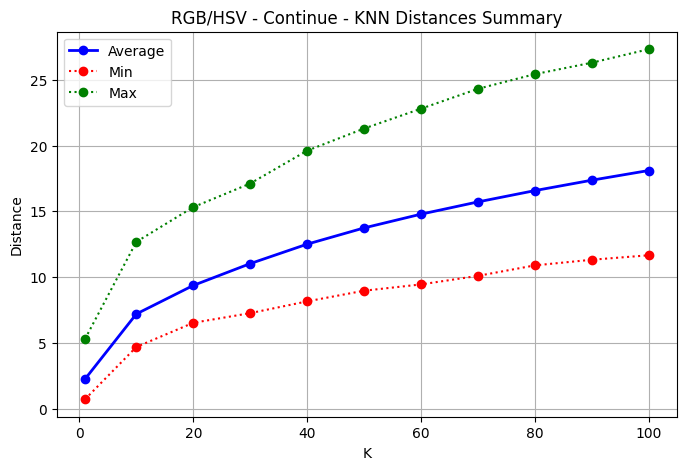

In [17]:
import statistics as stats

closest = con_knn_distances_l1['closest_distances']  # your dict

def flatten_one_level(x):
    if not x:
        return []
    if isinstance(x[0], (list, tuple)):
        out = []
        for sub in x:
            if isinstance(sub, (list, tuple)):
                out.extend(sub)
            else:
                out.append(sub)
        return out
    return x

summary = {}
for k, v in closest.items():
    vals = flatten_one_level(v)
    if vals:  # skip empty
        summary[k] = {
            "min": min(vals),
            "max": max(vals),
            "avg": stats.fmean(vals),  # numerically robust mean
        }

# Example: print nicely, sorted by key
for k in sorted(summary):
    s = summary[k]
    print(f"{k}: min={s['min']:.6g}  max={s['max']:.6g}  avg={s['avg']:.6g}")
    
# Sort by keys
x = sorted(summary.keys())
y_min = [summary[k]["min"] for k in x]
y_max = [summary[k]["max"] for k in x]
y_avg = [summary[k]["avg"] for k in x]

plt.figure(figsize=(8,5))

# Plot avg as solid line with dots
plt.plot(x, y_avg, label="Average", color="blue", linewidth=2, marker="o")

# Plot min and max as dotted lines with dots
plt.plot(x, y_min, label="Min", color="red", linestyle="dotted", marker="o")
plt.plot(x, y_max, label="Max", color="green", linestyle="dotted", marker="o")

plt.title("RGB/HSV - Continue - KNN Distances Summary")
plt.xlabel("K")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

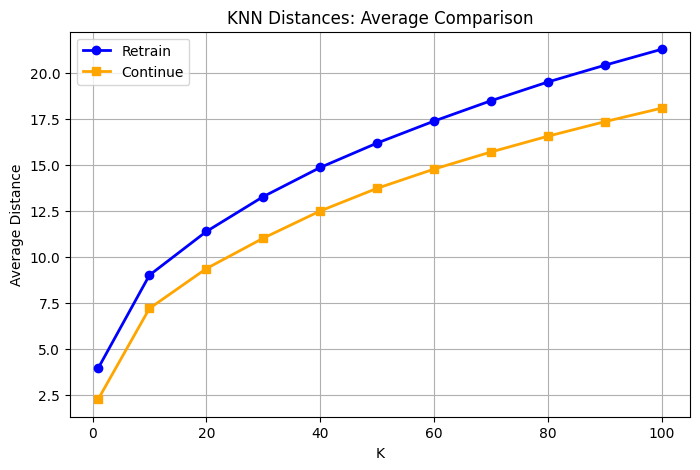

In [ ]:
import statistics as stats
import matplotlib.pyplot as plt

def flatten_one_level(x):
    if not x:
        return []
    if isinstance(x[0], (list, tuple)):
        out = []
        for sub in x:
            if isinstance(sub, (list, tuple)):
                out.extend(sub)
            else:
                out.append(sub)
        return out
    return x

def summarize(closest):
    summary = {}
    for k, v in closest.items():
        vals = flatten_one_level(v)
        if vals:
            summary[k] = stats.fmean(vals)
    return summary

def xy_from_summary(summary):
    x = sorted(summary.keys())
    y_avg = [summary[k] for k in x]
    return x, y_avg

# --- your two datasets ---
closest_a = knn_distances_l1['closest_distances']
closest_b = con_knn_distances_l1['closest_distances']

summary_a = summarize(closest_a)
summary_b = summarize(closest_b)

x_a, yavg_a = xy_from_summary(summary_a)
x_b, yavg_b = xy_from_summary(summary_b)

plt.figure(figsize=(8,5))

plt.plot(x_a, yavg_a, label="Retrain", color="blue", linewidth=2, marker="o")
plt.plot(x_b, yavg_b, label="Continue", color="orange", linewidth=2, marker="s")

plt.title("RGB/HSV - KNN Distances: Average Comparison")
plt.xlabel("K")
plt.ylabel("Average Distance")
plt.legend()
plt.grid(True)
plt.show()
